# Random Forest Regression

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('CutappsDS - Processed.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7368700.97 7239809.  ]
 [6640735.05 6884752.  ]
 [8776517.53 8813773.  ]
 [8709936.4  8628620.  ]
 [6760682.33 6939592.  ]
 [8524195.2  8555900.  ]
 [8901728.1  8671801.  ]
 [6669939.98 6498306.  ]
 [6794272.37 6569259.  ]
 [9321176.3  9138457.  ]
 [9321176.3  9002501.  ]
 [8169658.37 8470478.  ]
 [8291649.9  8179886.  ]
 [9708036.6  9648279.  ]
 [6835565.45 6553315.  ]
 [9321176.3  9457001.  ]
 [7313079.58 7401323.  ]
 [7793468.25 7735375.  ]
 [7231116.28 7306134.  ]
 [7274495.3  7428249.  ]
 [7134062.4  7066596.  ]
 [7715453.7  7699064.  ]
 [8164529.89 8009653.  ]
 [8154126.6  8334613.  ]
 [8150702.7  8290939.  ]
 [7814576.33 7571987.  ]
 [8865207.6  8800474.  ]
 [6669939.98 6564117.  ]
 [8724783.3  8887705.  ]
 [7669699.57 7551454.  ]
 [6098945.13 6429933.  ]
 [8168598.6  8248009.  ]
 [8820526.9  8914446.  ]
 [6379641.9  6134679.  ]
 [7766407.1  7744765.  ]
 [8865207.6  8840979.  ]
 [8274477.71 8442552.  ]
 [7832047.4  7897349.  ]
 [8272007.33 8373064.  ]
 [8865207.6  8601030.  ]


## Evaluating the Model Performance

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9581694018944329

# Visualisation

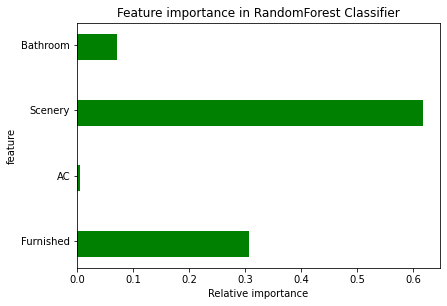

<Figure size 360x360 with 0 Axes>

In [22]:
col = ["Furnished" , "AC" , "Scenery" , "Bathroom"]
#modelname.feature_importance_
y = regressor.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color= "green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

# Predicting Sale value

In [25]:
regressor.predict([[6, 0 , 7, 1]])

array([8639711.3])

# Complete Tree structure (Each tree)

In [23]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in regressor.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=col,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1